In [7]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
df = pd.DataFrame(pd.read_csv('covtype.data',header = None))

In [9]:
df.shape

(581012, 55)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [11]:
df.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']

In [12]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [15]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [18]:
#Let's check for missing values 
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


### Skewness

In [19]:
print('Skewness of the below features:')
print(df.skew())

Skewness of the below features:
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

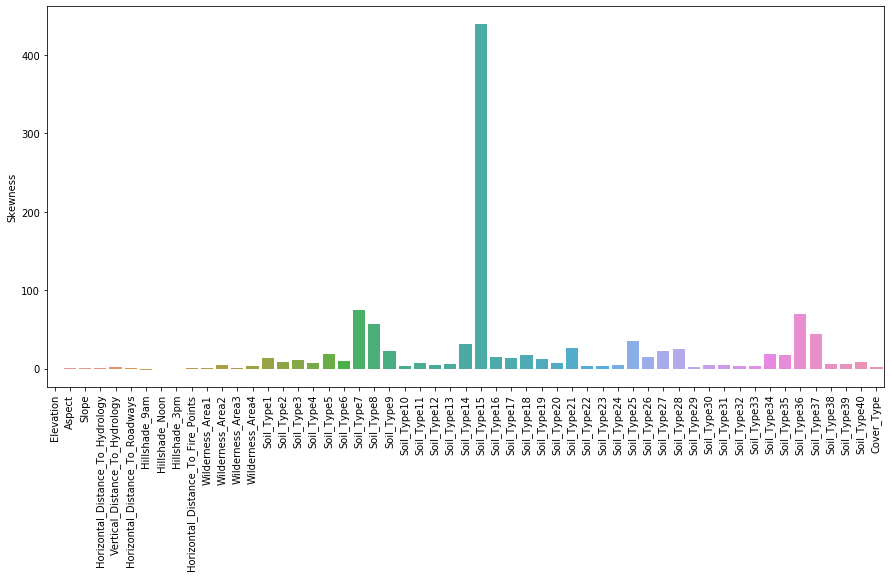

In [20]:
skew=df.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

### class balance

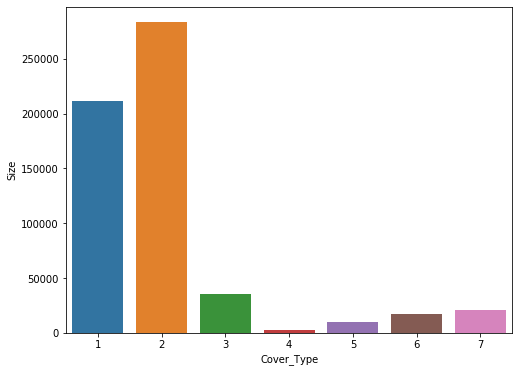

In [21]:
class_dist=df.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

### percentwise distribution of each class

In [22]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type 1
36.46 %
Cover_Type 2
48.76 %
Cover_Type 3
6.15 %
Cover_Type 4
0.47 %
Cover_Type 5
1.63 %
Cover_Type 6
2.99 %
Cover_Type 7
3.53 %


## converting the whole data into few Mini datasets
     cont_data - Data without binary features i.e continuous features
     binary_Data - Data having all binary features [Wilderness Areas + Soil Types]
     wilderness_Data - Binary Wilderness Areas
     Soil_Data - Binary Soil Types


In [24]:
cont_data=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=df.loc[:,'Wilderness_Area1':'Soil_Type40']

Wilderness_data=df.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data=df.loc[:,'Soil_Type1':'Soil_Type40']

In [25]:
#Iterate via columns of data having only binary features
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260796
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551128
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327648
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544044
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577981
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573487
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576189
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568616
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579415
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574437
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580907
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580833
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579865
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548378
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568602
1 

In [26]:
print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)

Soil Type  Occurence_count
Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


## EDA (Exploratory Data Analysis)

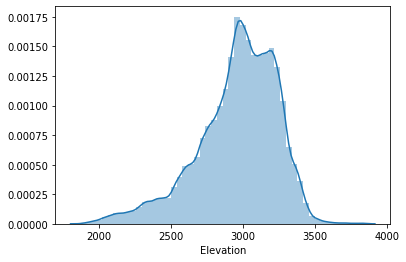

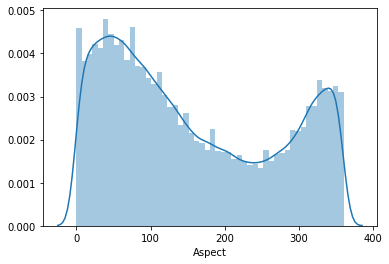

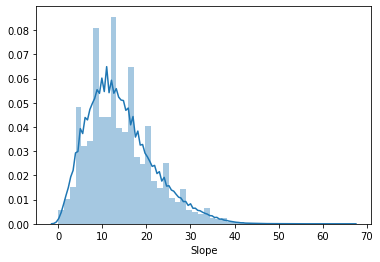

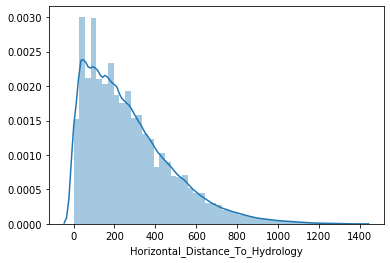

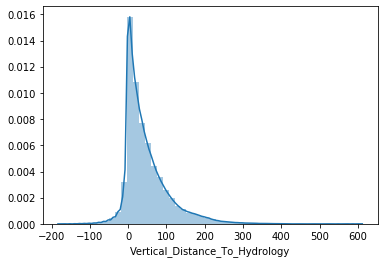

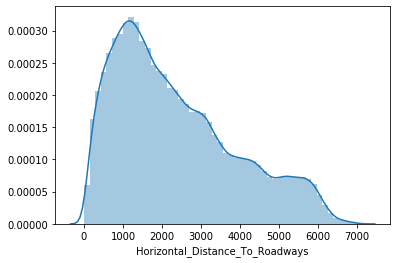

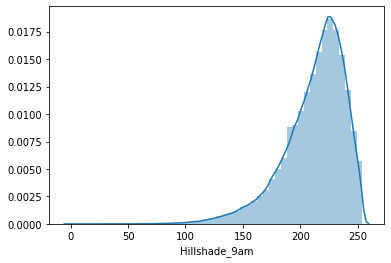

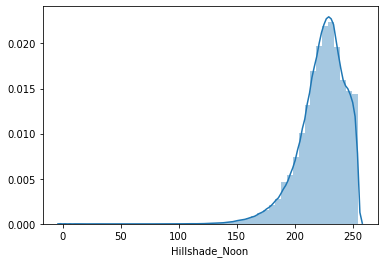

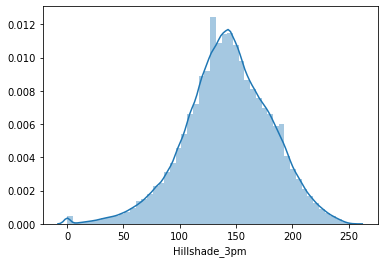

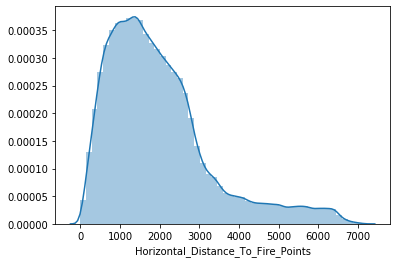

In [27]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

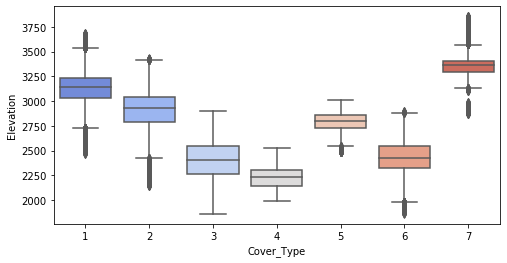

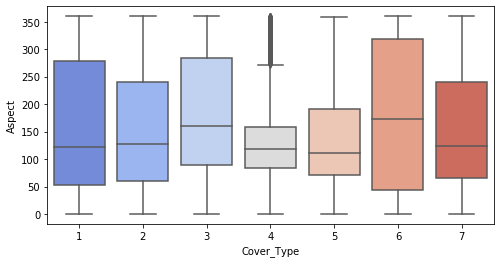

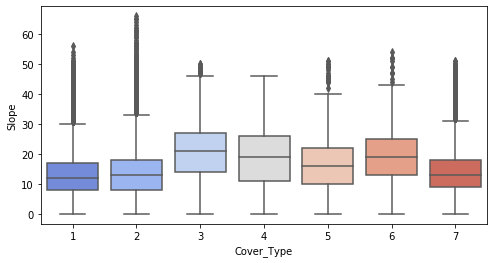

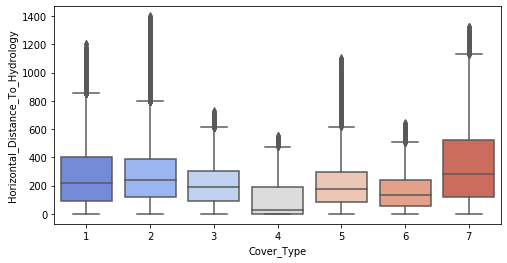

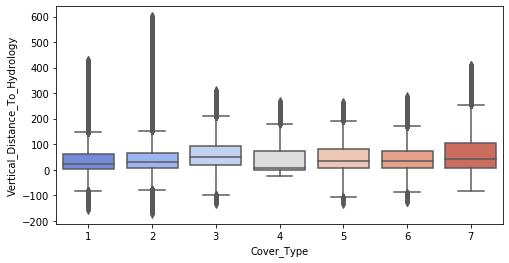

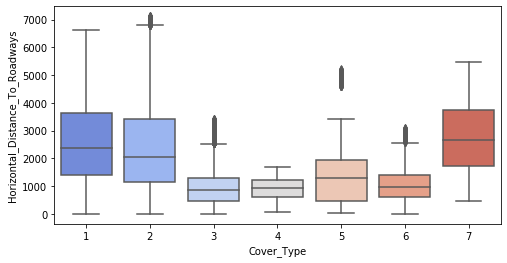

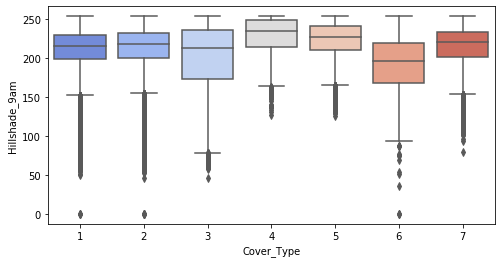

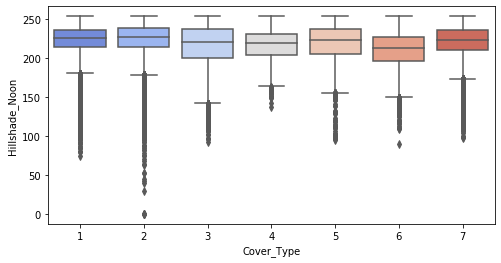

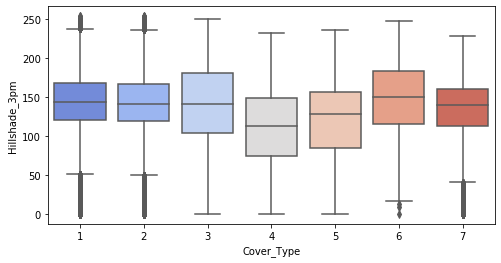

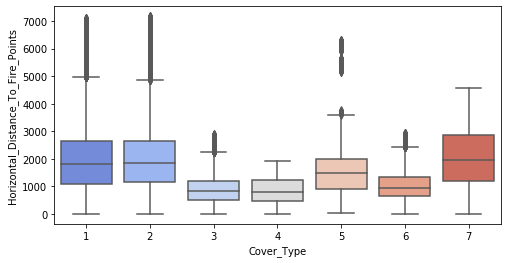

In [30]:
# %%time
df['Cover_Type']=df['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df['Cover_Type'], y=col, data=df, palette="coolwarm")

Wall time: 17.9 s


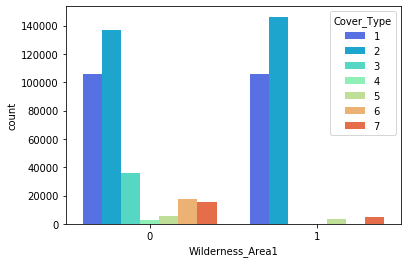

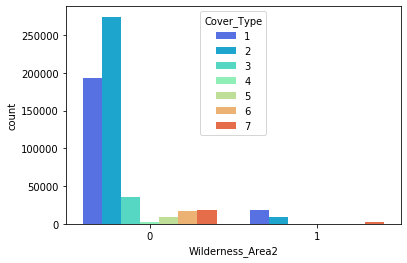

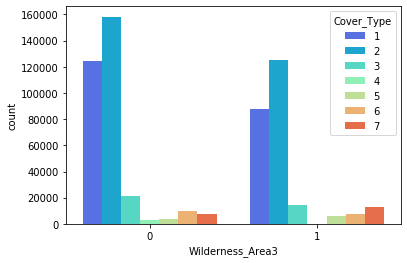

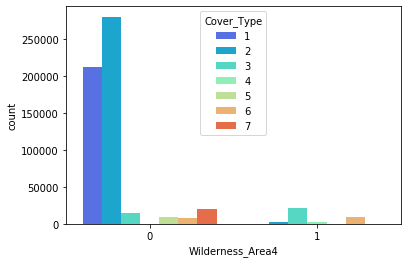

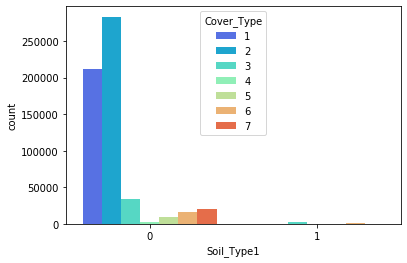

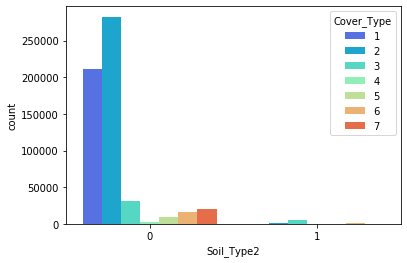

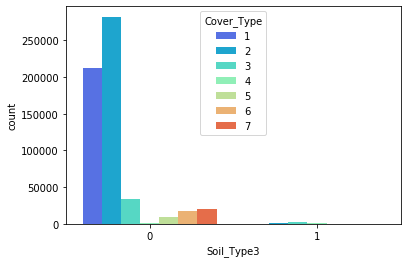

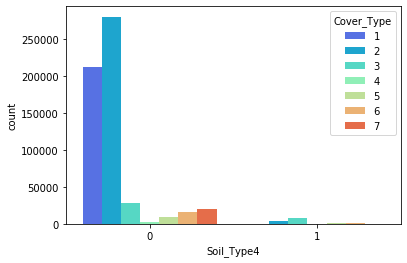

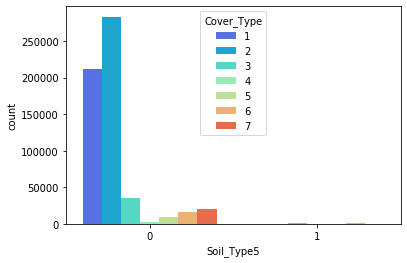

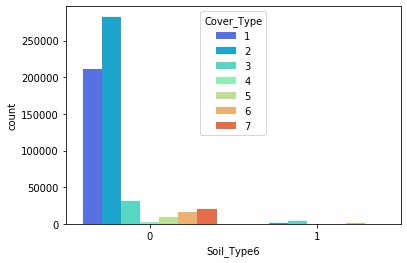

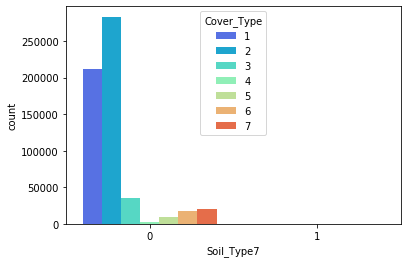

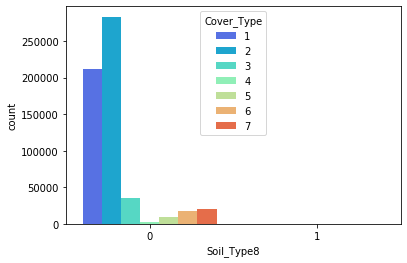

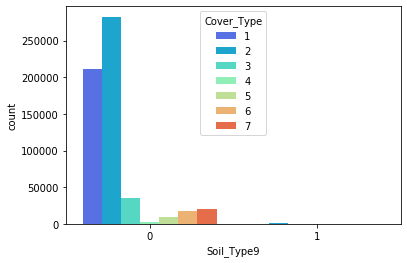

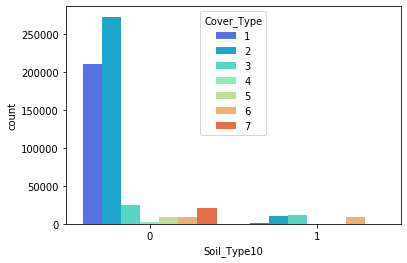

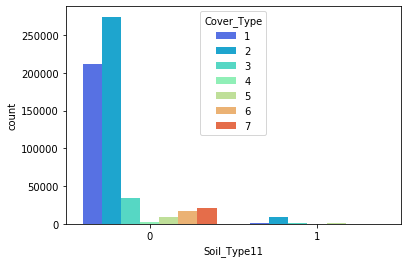

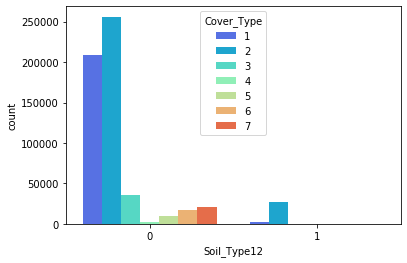

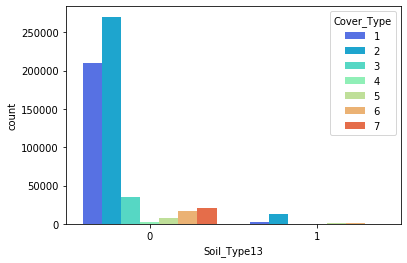

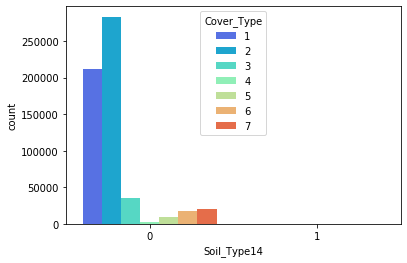

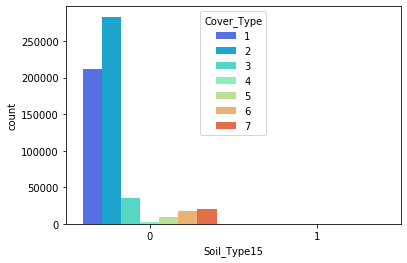

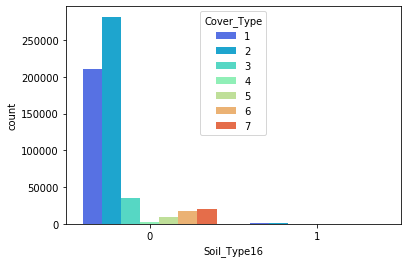

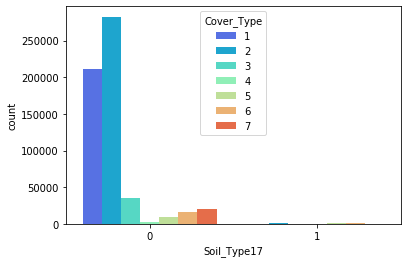

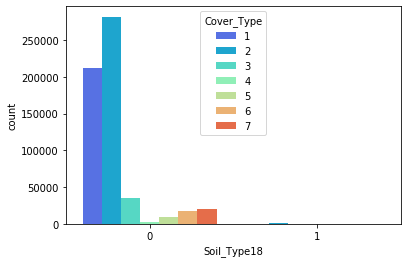

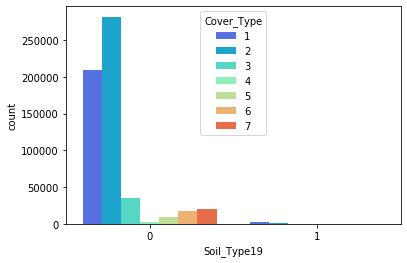

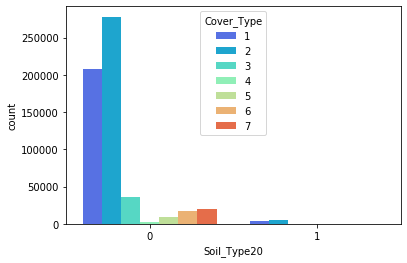

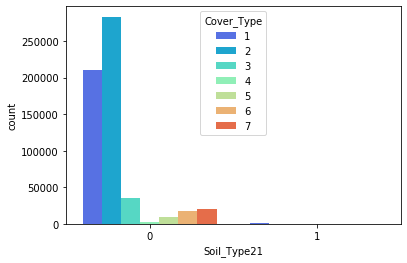

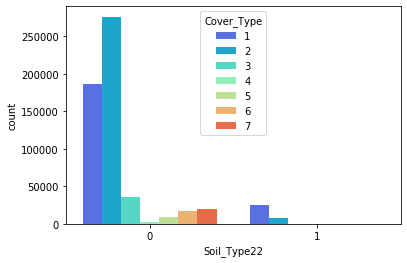

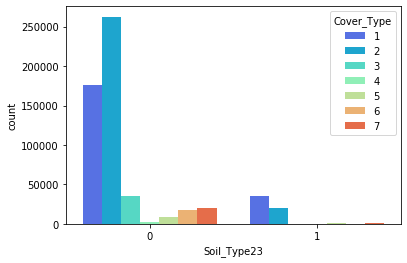

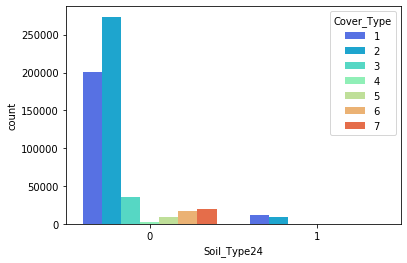

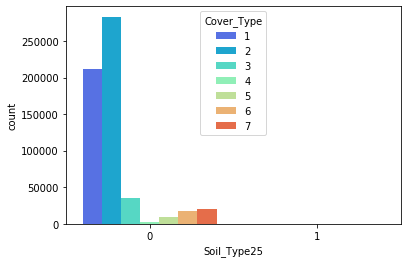

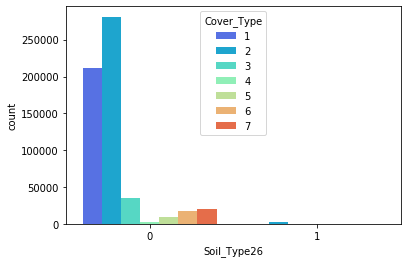

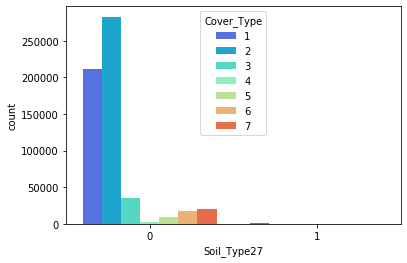

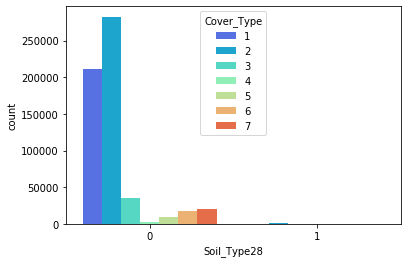

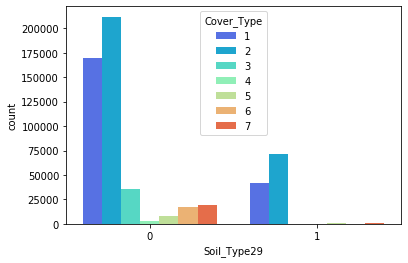

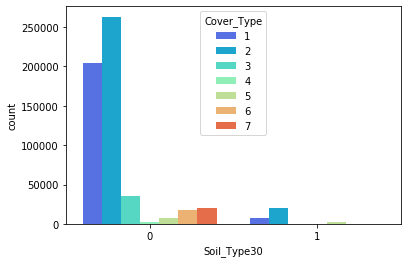

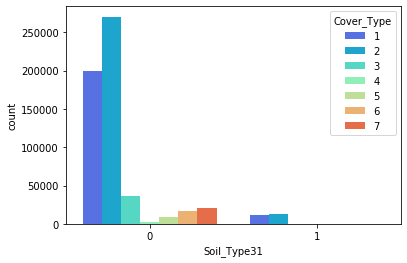

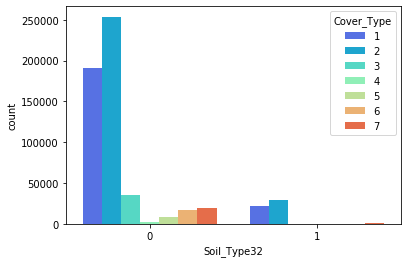

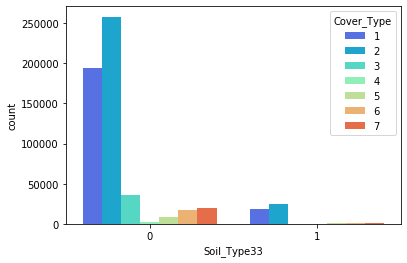

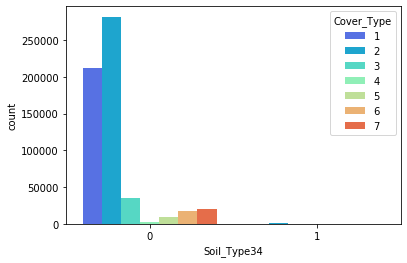

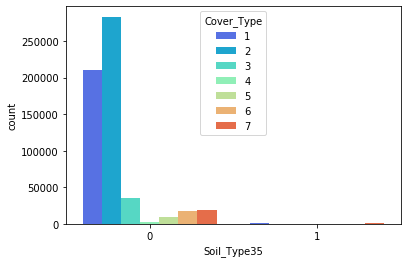

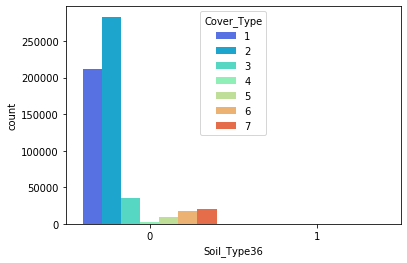

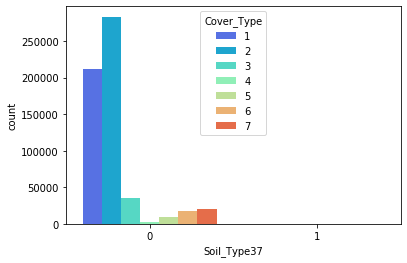

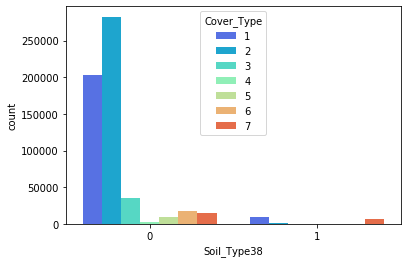

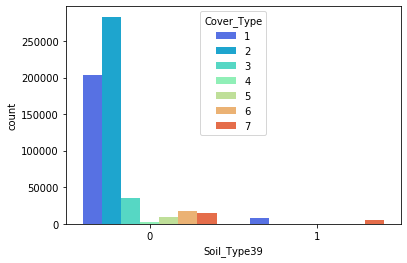

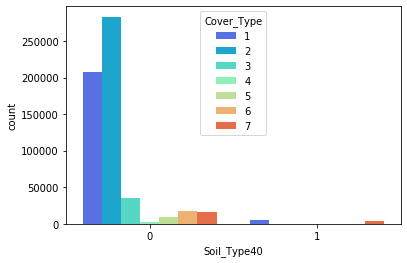

In [31]:
%%time
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=df['Cover_Type'] ,data=df, palette="rainbow")

In [32]:
def rev_code(row):
    for c in Soil_data.columns:
        if row[c]==1:
            return c  

df['Soil_Type']=Soil_data.apply(rev_code, axis=1)

In [34]:
def rev_code(row):
    for c in Wilderness_data.columns:
        if row[c]==1:
            return c  

df['Wilderness_Type']=Wilderness_data.apply(rev_code, axis=1)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

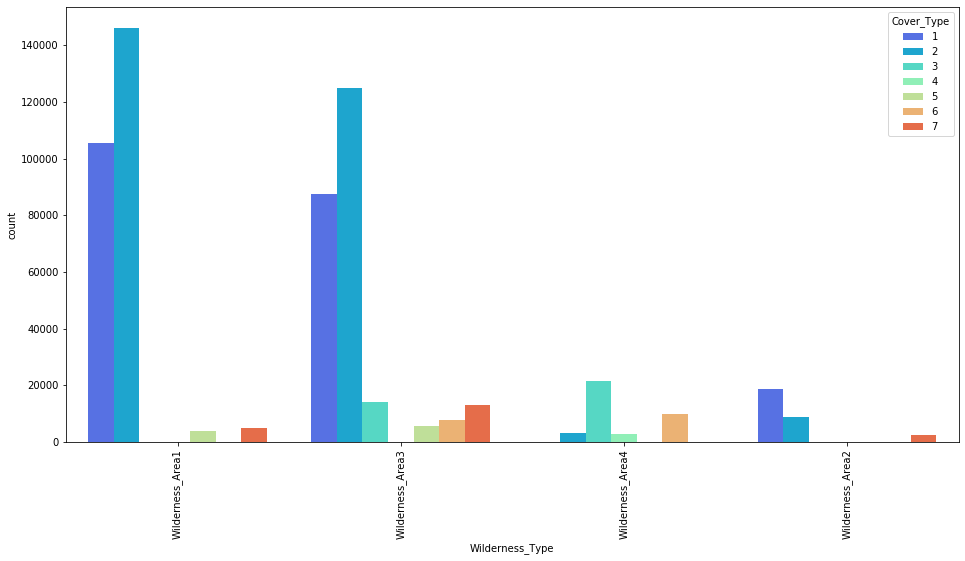

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=df, palette="rainbow")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

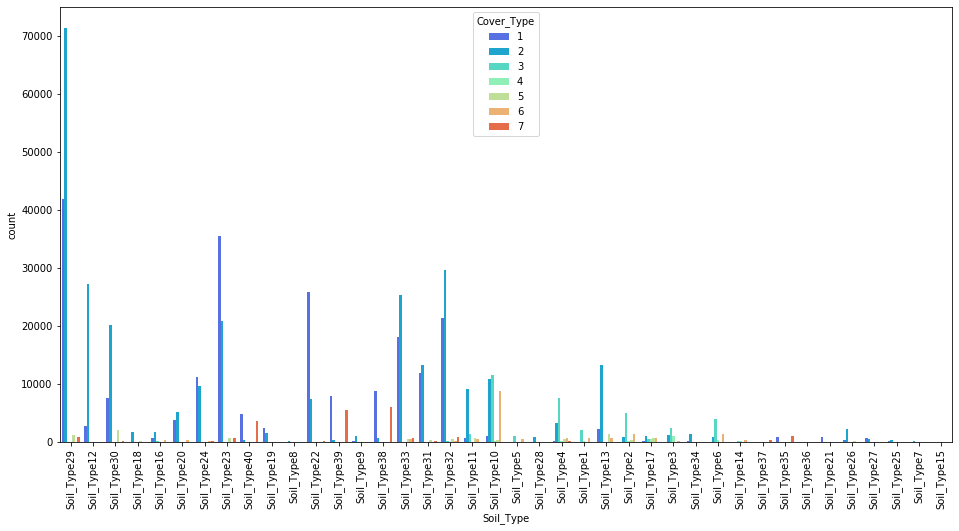

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=df, palette="rainbow")
plt.xticks(rotation=90)

In [38]:
soil_counts = []
for num in range(1,41):
    col = ('Soil_Type' + str(num))
    this_soil = df[col].groupby(df['Cover_Type'])
    totals = []
    for value in this_soil.sum():
        totals.append(value)
    total_sum = sum(totals)
    soil_counts.append(total_sum)
    print("Total Trees in Soil Type {0}: {1}".format(num, total_sum))
    percentages = [ (total*100 / total_sum) for total in totals]
    print("{0}\n".format(percentages))
print("Number of trees in each soil type:\n{0}".format(soil_counts))

Total Trees in Soil Type 1: 3031
[0.0, 0.0, 69.31705707687232, 5.872649290663148, 0.0, 24.810293632464532, 0.0]

Total Trees in Soil Type 2: 7525
[0.0, 11.322259136212624, 66.32558139534883, 1.5282392026578073, 3.5083056478405314, 17.3156146179402, 0.0]

Total Trees in Soil Type 3: 4823
[0.0, 24.694173750777523, 49.98963300850093, 21.107194692100354, 0.0, 4.2089985486211905, 0.0]

Total Trees in Soil Type 4: 12396
[1.468215553404324, 26.22620200064537, 60.511455308163924, 1.3552758954501452, 4.719264278799613, 5.090351726363343, 0.6292352371732817]

Total Trees in Soil Type 5: 1597
[0.0, 0.0, 60.55103318722605, 3.005635566687539, 0.0, 36.44333124608641, 0.0]

Total Trees in Soil Type 6: 6575
[0.0, 13.870722433460076, 60.73003802281369, 4.866920152091255, 0.0, 20.53231939163498, 0.0]

Total Trees in Soil Type 7: 105
[0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Total Trees in Soil Type 8: 179
[24.022346368715084, 75.97765363128492, 0.0, 0.0, 0.0, 0.0, 0.0]

Total Trees in Soil Type 9: 1147
[14

## heatmap

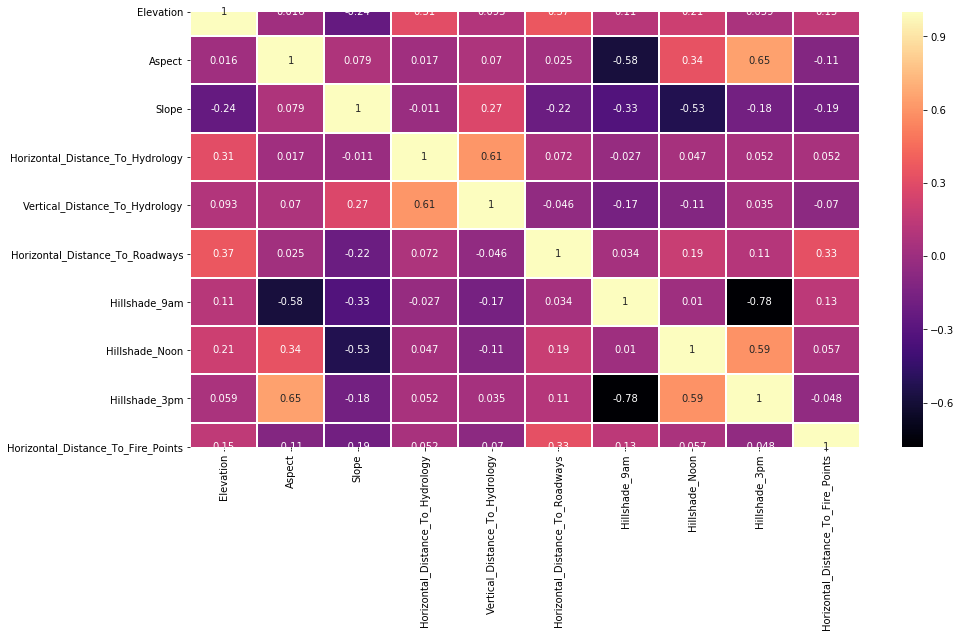

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)
plt.show()

### Data Modelling

In [42]:
X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']

In [44]:
#Removed Features
rem=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [45]:
X.drop(rem, axis=1, inplace=True)

In [46]:
#Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [47]:
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

Text(0, 0.5, 'Accuracy')

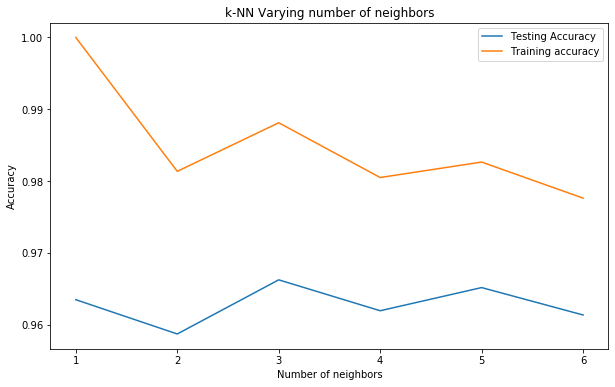

In [48]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
#plt.show()

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
Accuracy=knn.score(X_test,y_test)
print('KNN Accuracy:',Accuracy)

KNN Accuracy: 0.9651700477326969
